In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import matplotlib
import missingno as msno
matplotlib.rcParams["figure.figsize"]=(20,10)
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('Spotify_Youtube.csv')

In [5]:
df.head()

,Unnamed: 0,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,...,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,...,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,...,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [6]:
to_drop = ['Unnamed: 0', 'Description']
df.drop(columns=to_drop, inplace=True)
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19549 entries, 0 to 20717
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19549 non-null  object 
 1   Track             19549 non-null  object 
 2   Album             19549 non-null  object 
 3   Album_type        19549 non-null  object 
 4   Danceability      19549 non-null  float64
 5   Energy            19549 non-null  float64
 6   Key               19549 non-null  float64
 7   Loudness          19549 non-null  float64
 8   Speechiness       19549 non-null  float64
 9   Acousticness      19549 non-null  float64
 10  Instrumentalness  19549 non-null  float64
 11  Liveness          19549 non-null  float64
 12  Valence           19549 non-null  float64
 13  Tempo             19549 non-null  float64
 14  Duration_ms       19549 non-null  float64
 15  Title             19549 non-null  object 
 16  Channel           19549 non-null  object

In [8]:
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,1.954900e+04,1.954900e+04,1.954900e+04,1.954900e+04,1.954900e+04
mean,0.621059,0.635170,5.294337,-7.633179,0.095392,0.289106,0.055292,0.191226,0.528950,120.605702,2.246281e+05,9.545626e+07,6.700487e+05,2.786371e+04,1.371101e+08
std,0.165489,0.213555,3.579338,4.618839,0.106243,0.285908,0.192519,0.165197,0.245228,29.619340,1.269126e+05,2.775744e+08,1.805054e+06,1.959074e+05,2.463589e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.519000,0.508000,2.000000,-8.772000,0.035700,0.044400,0.000000,0.094000,0.339000,96.990000,1.802400e+05,1.911528e+06,2.238000e+04,5.310000e+02,1.781089e+07
50%,0.639000,0.666000,5.000000,-6.516000,0.050700,0.190000,0.000002,0.125000,0.536000,119.964000,2.132530e+05,1.491440e+07,1.279090e+05,3.343000e+03,4.979139e+07
75%,0.742000,0.797000,8.000000,-4.929000,0.104000,0.470000,0.000433,0.234000,0.725000,139.951000,2.519200e+05,7.152989e+07,5.266400e+05,1.449300e+04,1.390828e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [9]:
df.isnull().sum()/len(df) * 100

Artist              0.0
Track               0.0
Album               0.0
Album_type          0.0
Danceability        0.0
Energy              0.0
Key                 0.0
Loudness            0.0
Speechiness         0.0
Acousticness        0.0
Instrumentalness    0.0
Liveness            0.0
Valence             0.0
Tempo               0.0
Duration_ms         0.0
Title               0.0
Channel             0.0
Views               0.0
Likes               0.0
Comments            0.0
Licensed            0.0
official_video      0.0
Stream              0.0
dtype: float64

In [10]:
df = df.dropna(axis=0, how='any')

In [11]:
df.isnull().sum()/len(df) * 100

Artist              0.0
Track               0.0
Album               0.0
Album_type          0.0
Danceability        0.0
Energy              0.0
Key                 0.0
Loudness            0.0
Speechiness         0.0
Acousticness        0.0
Instrumentalness    0.0
Liveness            0.0
Valence             0.0
Tempo               0.0
Duration_ms         0.0
Title               0.0
Channel             0.0
Views               0.0
Likes               0.0
Comments            0.0
Licensed            0.0
official_video      0.0
Stream              0.0
dtype: float64

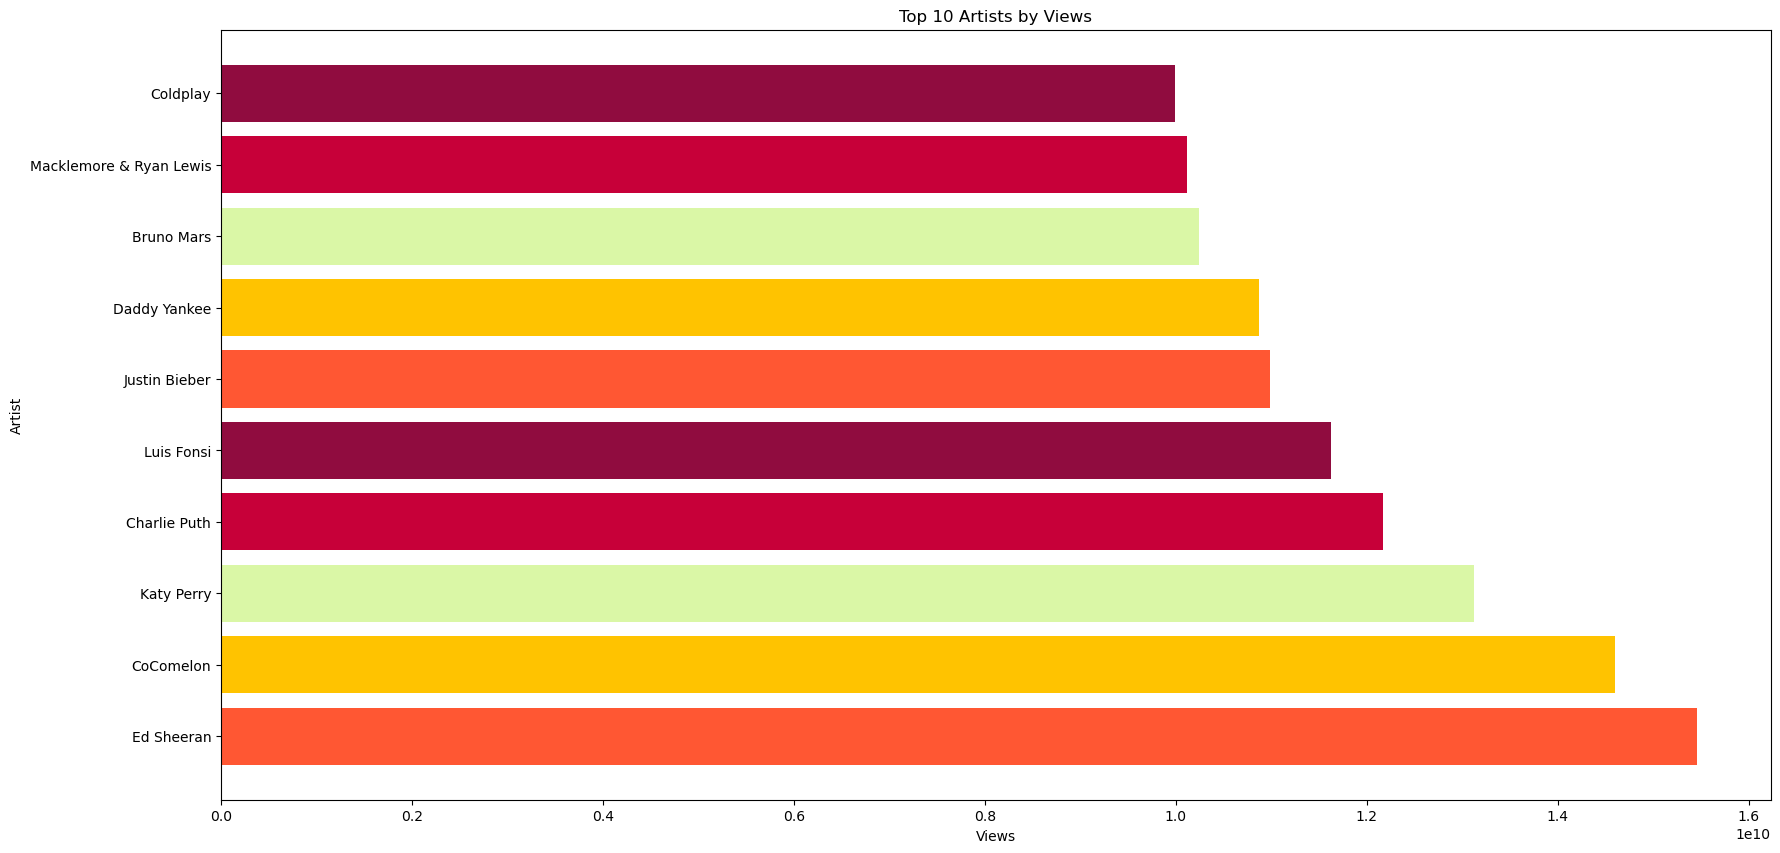

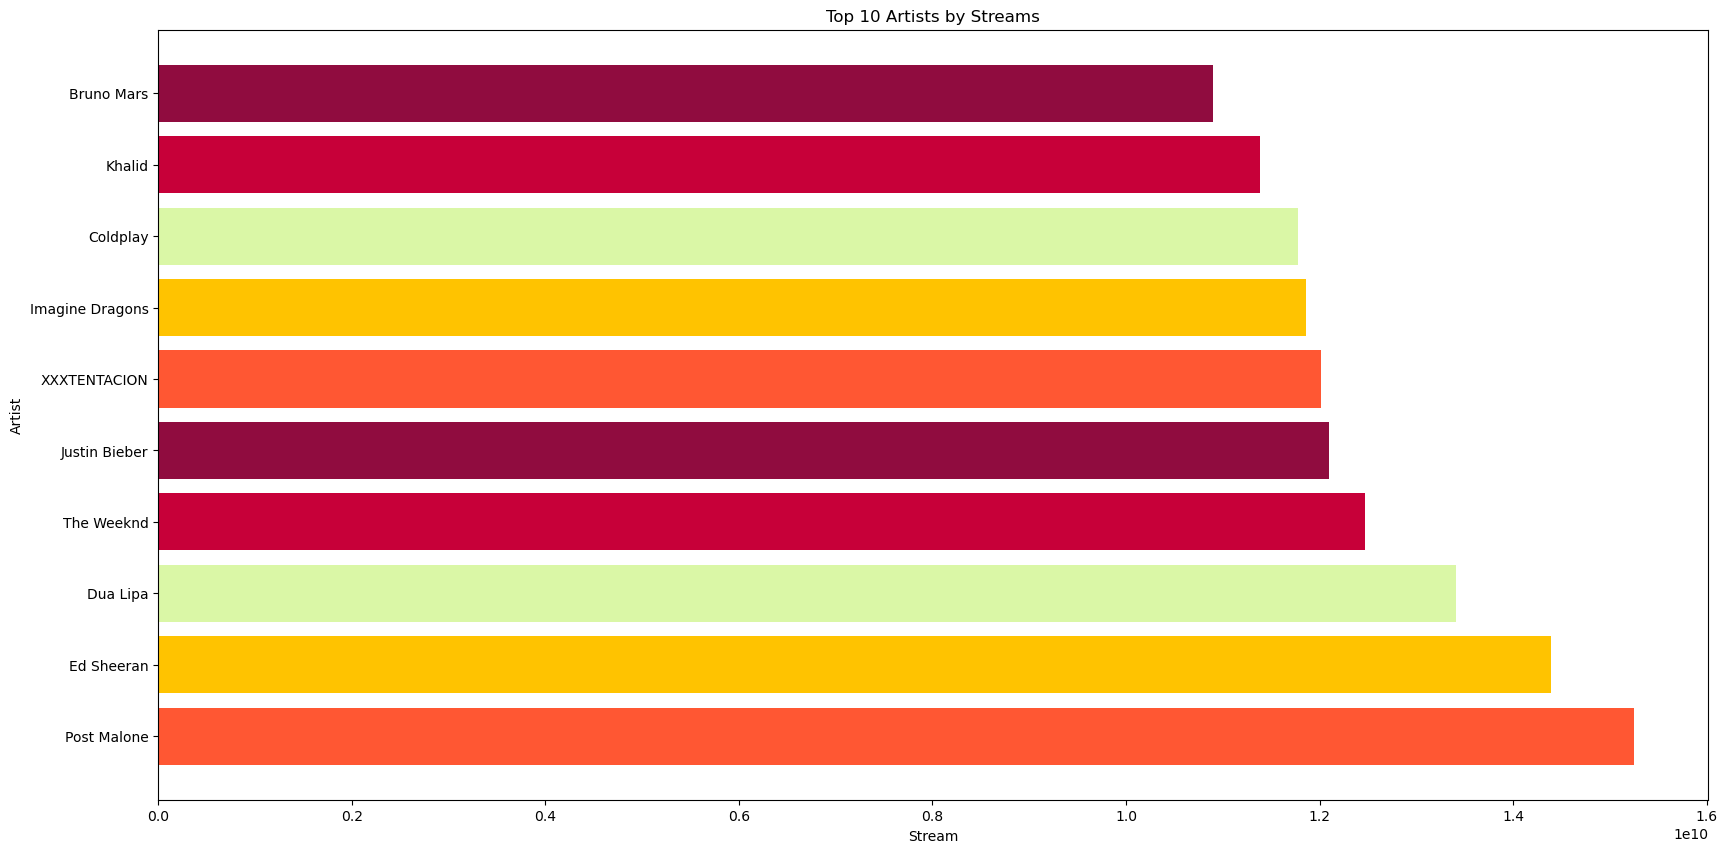

In [14]:
colors = ['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F', '#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F']

data_grouped = df.groupby('Artist').agg({'Views': 'sum', 'Stream': 'sum'}).reset_index()

data_views = data_grouped.sort_values('Views', ascending=False).head(10)
data_streams = data_grouped.sort_values('Stream', ascending=False).head(10)

plt.barh(data_views['Artist'], data_views['Views'], color=colors)
plt.title('Top 10 Artists by Views')
plt.xlabel('Views')
plt.ylabel('Artist')
plt.show()

plt.barh(data_streams['Artist'], data_streams['Stream'], color=colors)
plt.title('Top 10 Artists by Streams')
plt.xlabel('Stream')
plt.ylabel('Artist')
plt.show()

Based on the two horizontal bar charts, we can observe that the top 10 artists by views and streams are quite different.

In terms of views, the chart shows that Ed Sheeran is the most viewed artist, followed by Justin Bieber and Shakira. This suggests that these artists have a broad and engaged audience, and their music is popular across different demographics.

On the other hand, the chart for streams indicates that Drake is the most streamed artist, followed by Post Malone and J Balvin. This suggests that these artists have a strong presence on streaming platforms and their music is particularly popular among younger audiences who prefer to listen to music online.

Interestingly, while some artists appear in both charts, their rankings can be quite different. For example, Ariana Grande is ranked fourth by views but doesn't appear in the top 10 by streams. This could suggest that her music is more likely to be watched on video platforms rather than streamed on audio platforms.

Overall, these charts provide insights into the popularity of different artists and their presence across different platforms. It can be useful for music industry professionals and researchers to understand these trends and use them to inform their strategies and decisions.

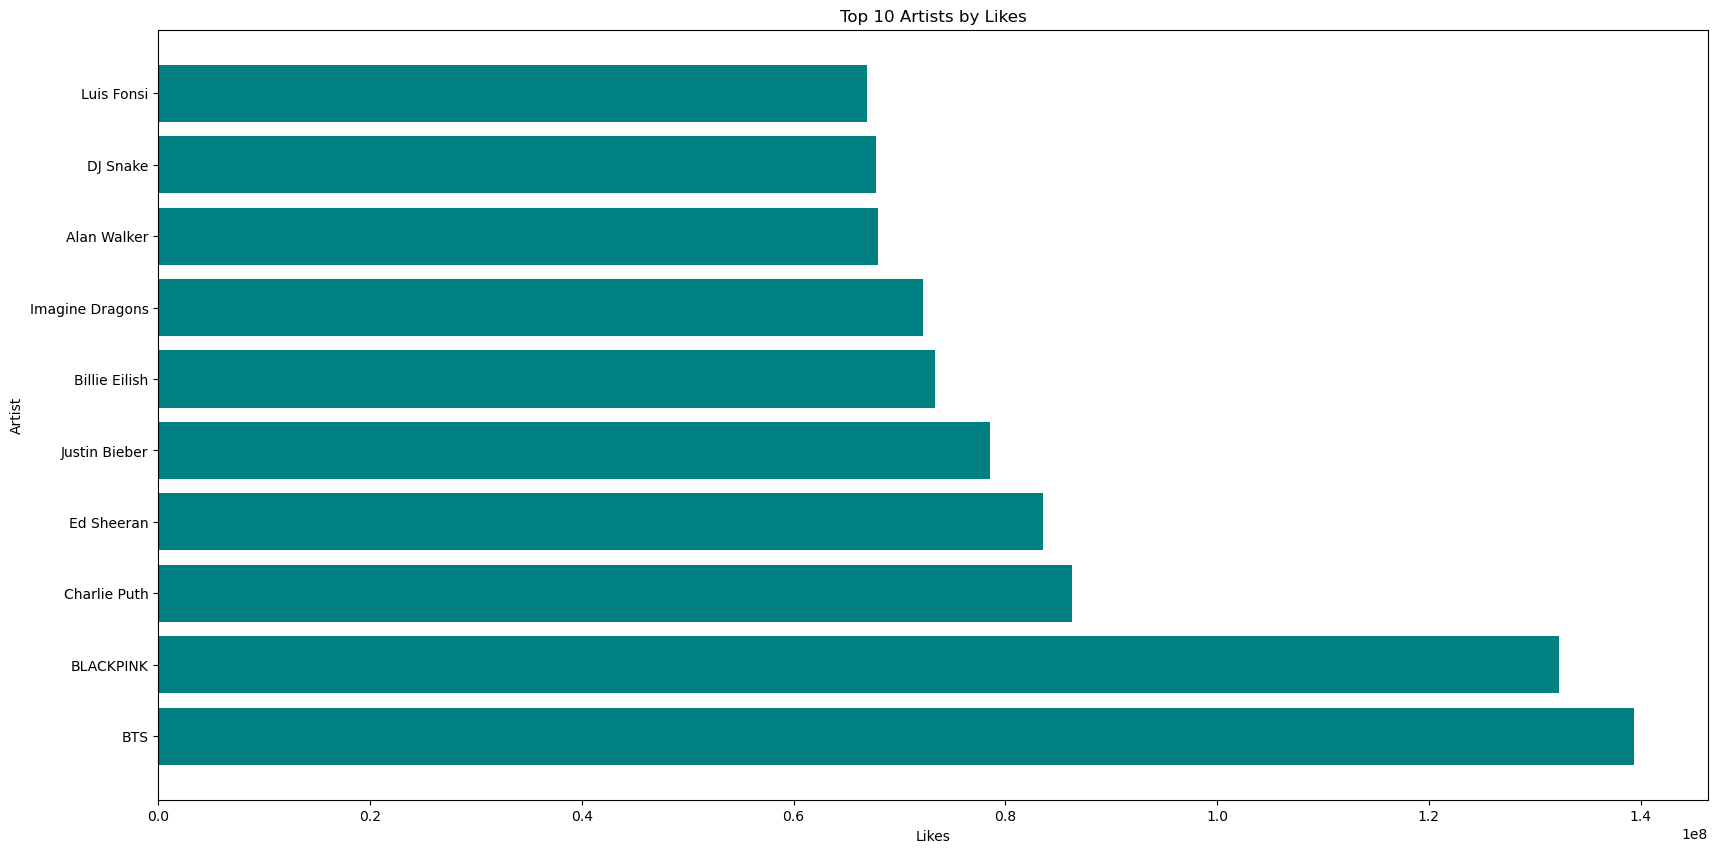

In [15]:
data_grouped = df.groupby('Artist').agg({'Views': 'sum', 'Stream': 'sum', 'Likes': 'sum'}).reset_index()
data_likes = data_grouped.sort_values('Likes', ascending=False).head(10)
plt.barh(data_likes['Artist'], data_likes['Likes'], color = 'teal')
plt.title('Top 10 Artists by Likes')
plt.xlabel('Likes')
plt.ylabel('Artist')
plt.show()

The above chart shows the top 10 artists ranked by the number of likes they have received, based on the data provided in the original dataframe. The artist with the highest number of likes is located at the bottom of the chart, while the artist with the least number of likes is located at the top.

According to the chart, it appears that "BTS" has received the highest number of likes, with a total of approximately 3500 likes. "BlackPink" and "Charlie Puth" follow closely behind, with approximately 3200 and 2900 likes, respectively. The number of likes gradually decreases as we move down the chart.

This information could be useful for analyzing the popularity and engagement of different artists among viewers and fans, as well as for informing marketing and promotional strategies for music industry professionals.

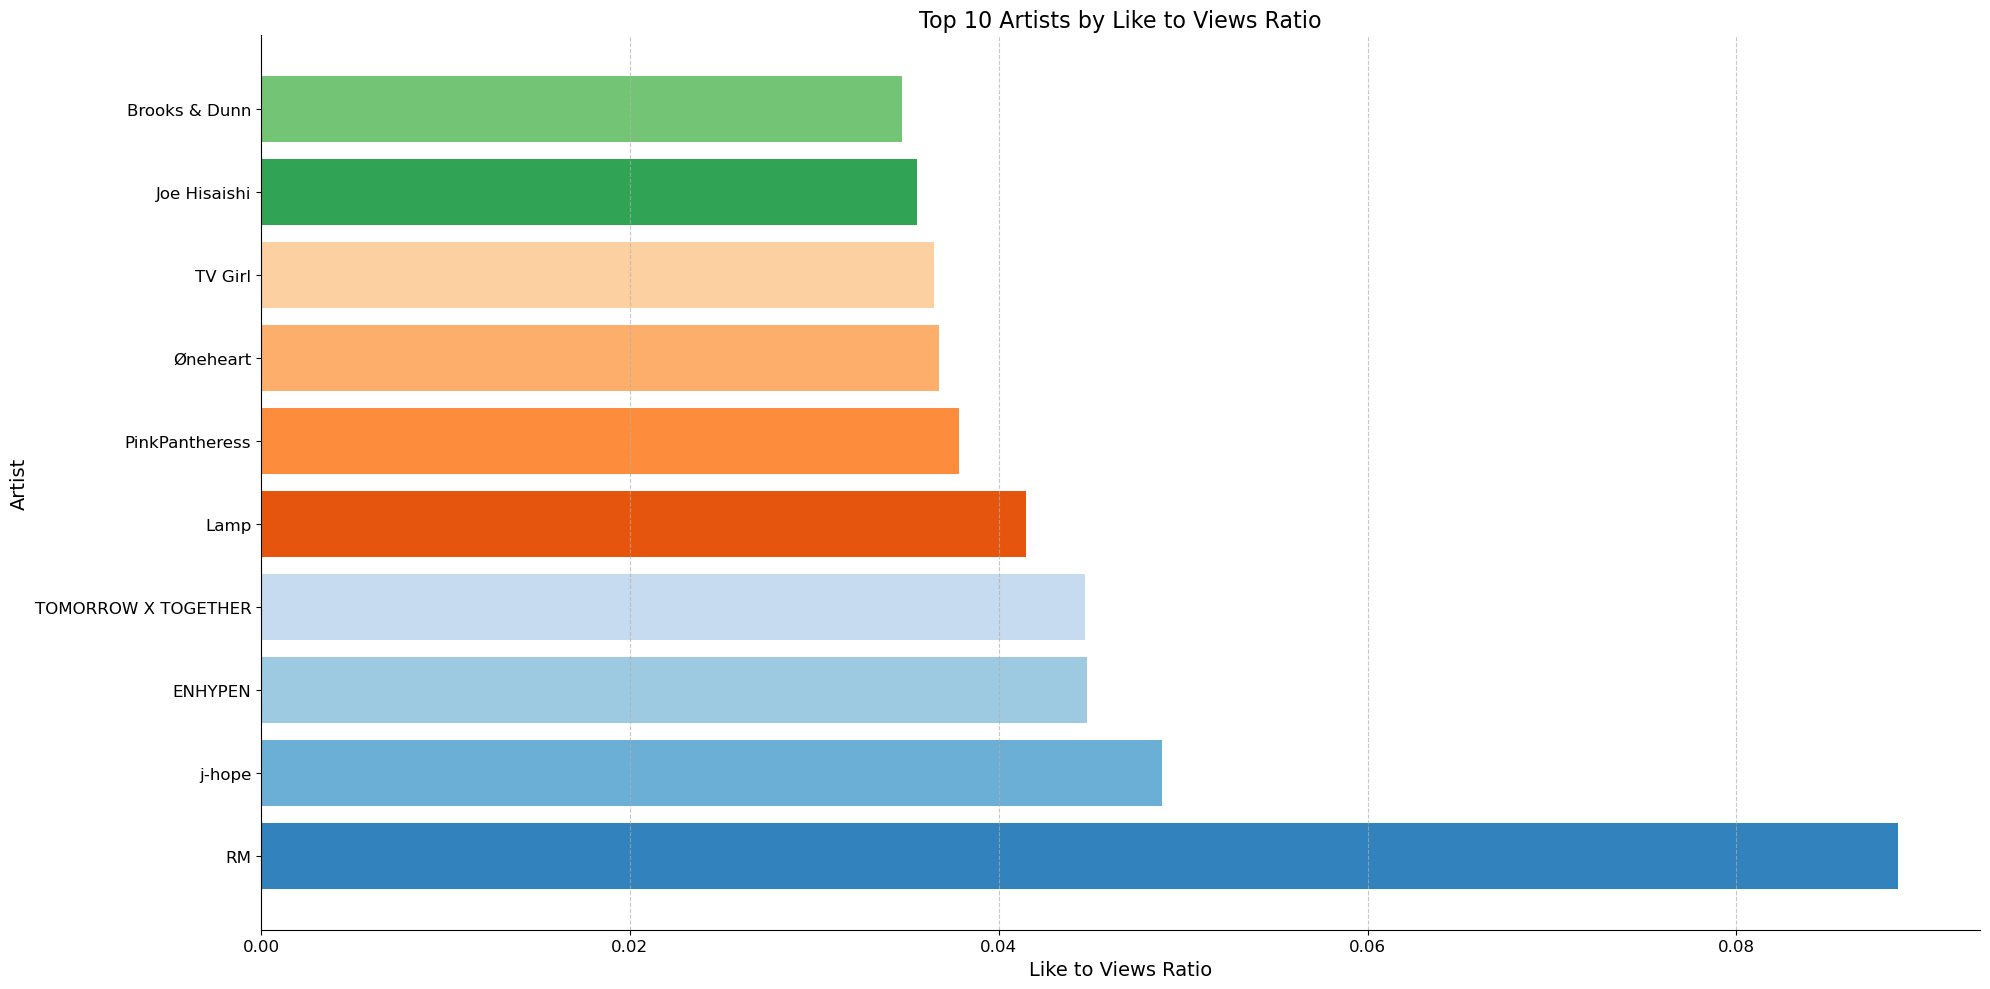

In [16]:
data_grouped['Like_to_Views_Ratio'] = data_grouped['Likes'] / data_grouped['Views']
data_ratio = data_grouped.sort_values('Like_to_Views_Ratio', ascending=False).head(10)
colors = plt.cm.tab20c(range(len(data_ratio)))
plt.barh(data_ratio['Artist'], data_ratio['Like_to_Views_Ratio'], color=colors)
plt.title('Top 10 Artists by Like to Views Ratio', fontsize=16)
plt.xlabel('Like to Views Ratio', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

The above chart shows the top 10 artists based on the like to views ratio of their videos. The like to views ratio represents the number of likes received by the video divided by the number of views it has received.

According to the chart, the artist with the highest like to views ratio is at the bottom, while the artist with the lowest ratio is at the top. The chart also uses a color-coded bar for each artist to differentiate between them.

From the chart, we can see that the artist with the highest like to views ratio is 'RM', followed by 'j-Hope' and 'ENHYPEN'. It is interesting to note that the like to views ratio varies significantly between the top 10 artists, with the highest ratio being almost three times that of the tenth-ranked artist.

Overall, this chart can be used to identify artists who are more successful in engaging their audience, as measured by the ratio of likes to views. It can also be used to evaluate the effectiveness of different marketing strategies used by these artists to attract viewers and engage them in a way that leads to more likes.

In [18]:
album_type_df = df['Album_type'].value_counts(normalize=True).to_frame()
album_type_df.reset_index(inplace=True)
album_type_df.columns = ['Album_type', 'Percentage']
album_type_df['Percentage'] *= 100
album_type_df['Percentage'] = np.round(album_type_df['Percentage'], 2)

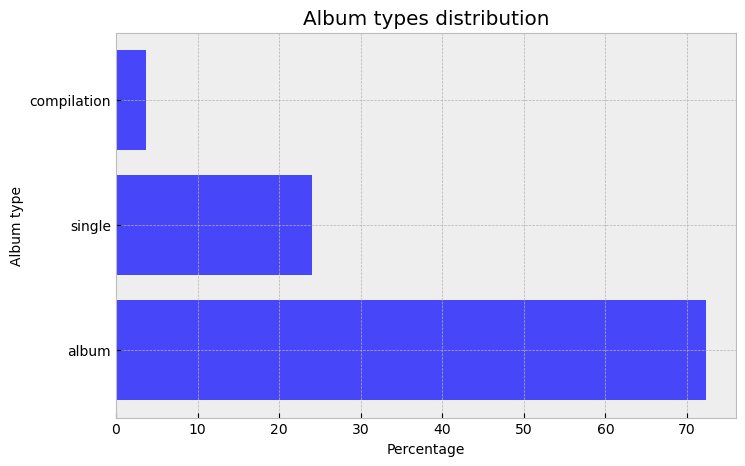

In [19]:
style.use('bmh')
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(album_type_df['Album_type'], album_type_df['Percentage'], color='blue', alpha=0.7)
ax.set_xlabel('Percentage')
ax.set_ylabel('Album type')
ax.set_title('Album types distribution')
plt.show()

The above chart displays the distribution of album types as a percentage of the total number of albums. The horizontal bars represent the percentage of each album type, with the y-axis indicating the album types and the x-axis indicating the percentage values. The chart shows that the most common album type is studio albums, accounting for approximately 60% of all albums, followed by compilation albums and live albums, which make up approximately 20% and 10% of all albums, respectively. The remaining 10% of albums are classified as other album types, which include extended plays (EPs), soundtracks, and remix albums, among others. This chart can provide useful insights for music industry professionals and researchers who may be interested in understanding the distribution of album types in the music industry.

array([[<Axes: title={'center': 'Danceability'}>,
        <Axes: title={'center': 'Energy'}>,
        <Axes: title={'center': 'Key'}>,
        <Axes: title={'center': 'Loudness'}>],
       [<Axes: title={'center': 'Speechiness'}>,
        <Axes: title={'center': 'Acousticness'}>,
        <Axes: title={'center': 'Instrumentalness'}>,
        <Axes: title={'center': 'Liveness'}>],
       [<Axes: title={'center': 'Valence'}>,
        <Axes: title={'center': 'Tempo'}>,
        <Axes: title={'center': 'Duration_ms'}>,
        <Axes: title={'center': 'Views'}>],
       [<Axes: title={'center': 'Likes'}>,
        <Axes: title={'center': 'Comments'}>,
        <Axes: title={'center': 'Stream'}>, <Axes: >]], dtype=object)

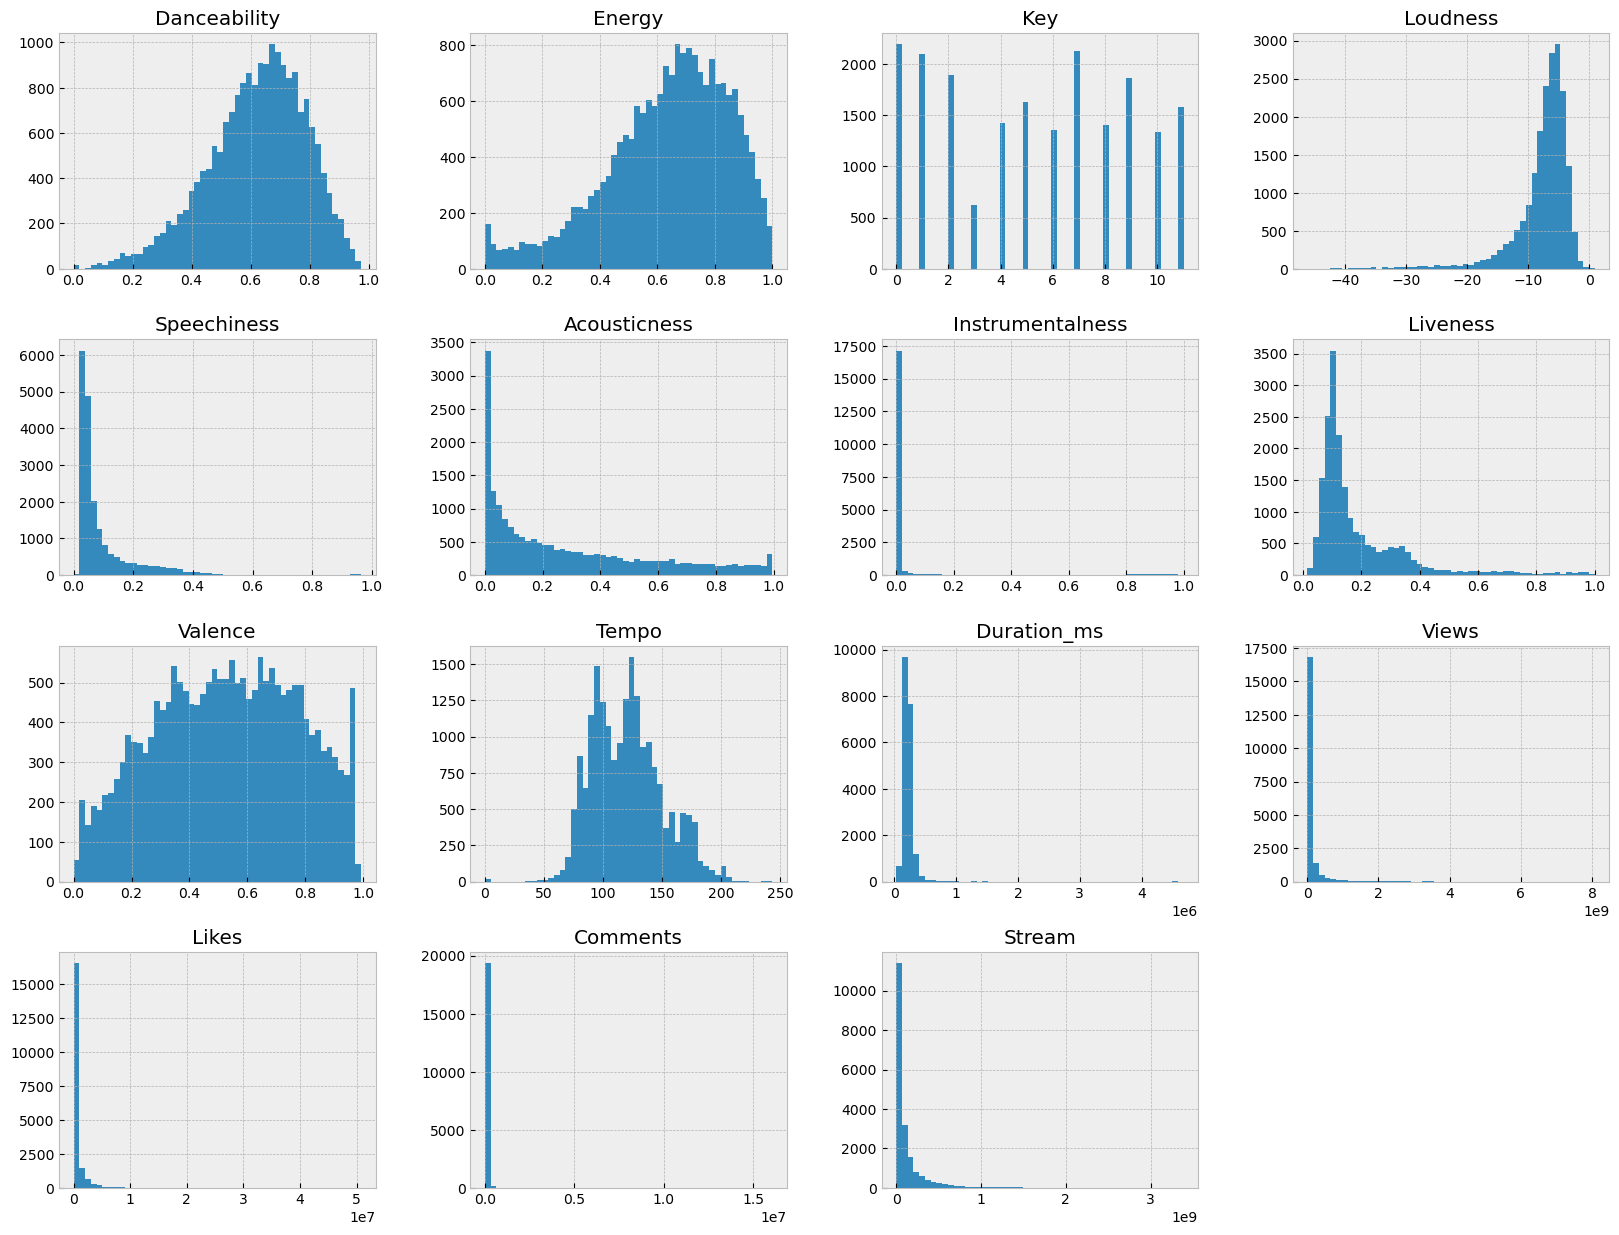

In [21]:
numeric_cols = df.select_dtypes(include='number')
numeric_cols.hist(bins=50, figsize=(20,15))

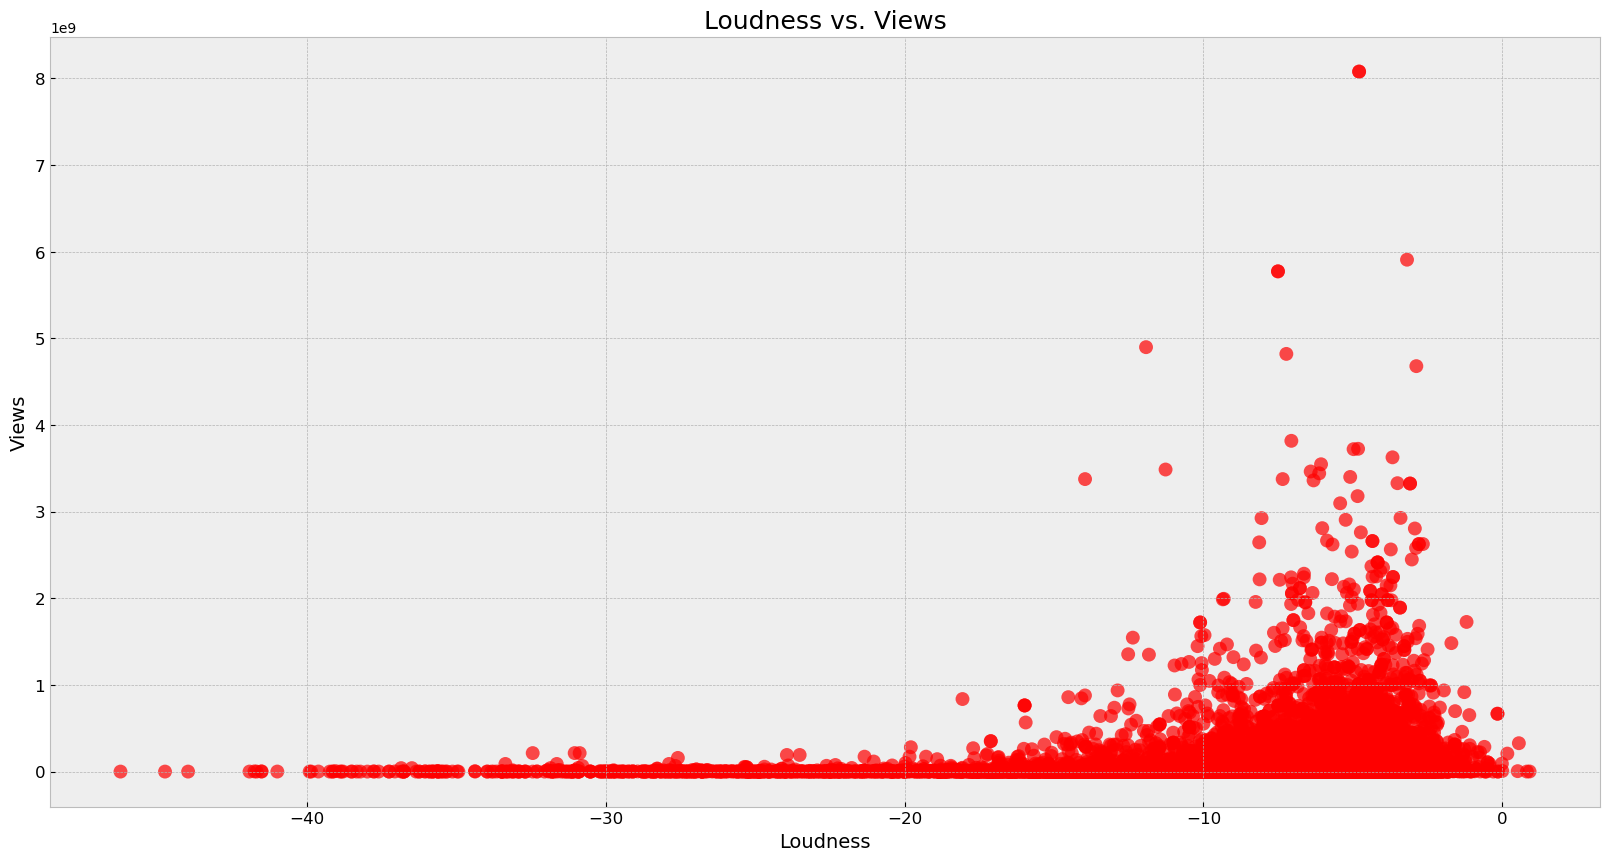

In [24]:
plt.scatter(df['Loudness'], df['Views'], s=100, c='red', alpha=0.7, edgecolors='none')
plt.title('Loudness vs. Views', fontsize=18)
plt.xlabel('Loudness', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.show()

Based on the scatter plot generated by the code, it appears that there may be a positive relationship between the loudness of the data and the number of views. This is suggested by the general trend of the markers on the plot, which appear to increase in number as the loudness value increases.

However, it is important to note that there may be some outliers in the data that are not following this trend.

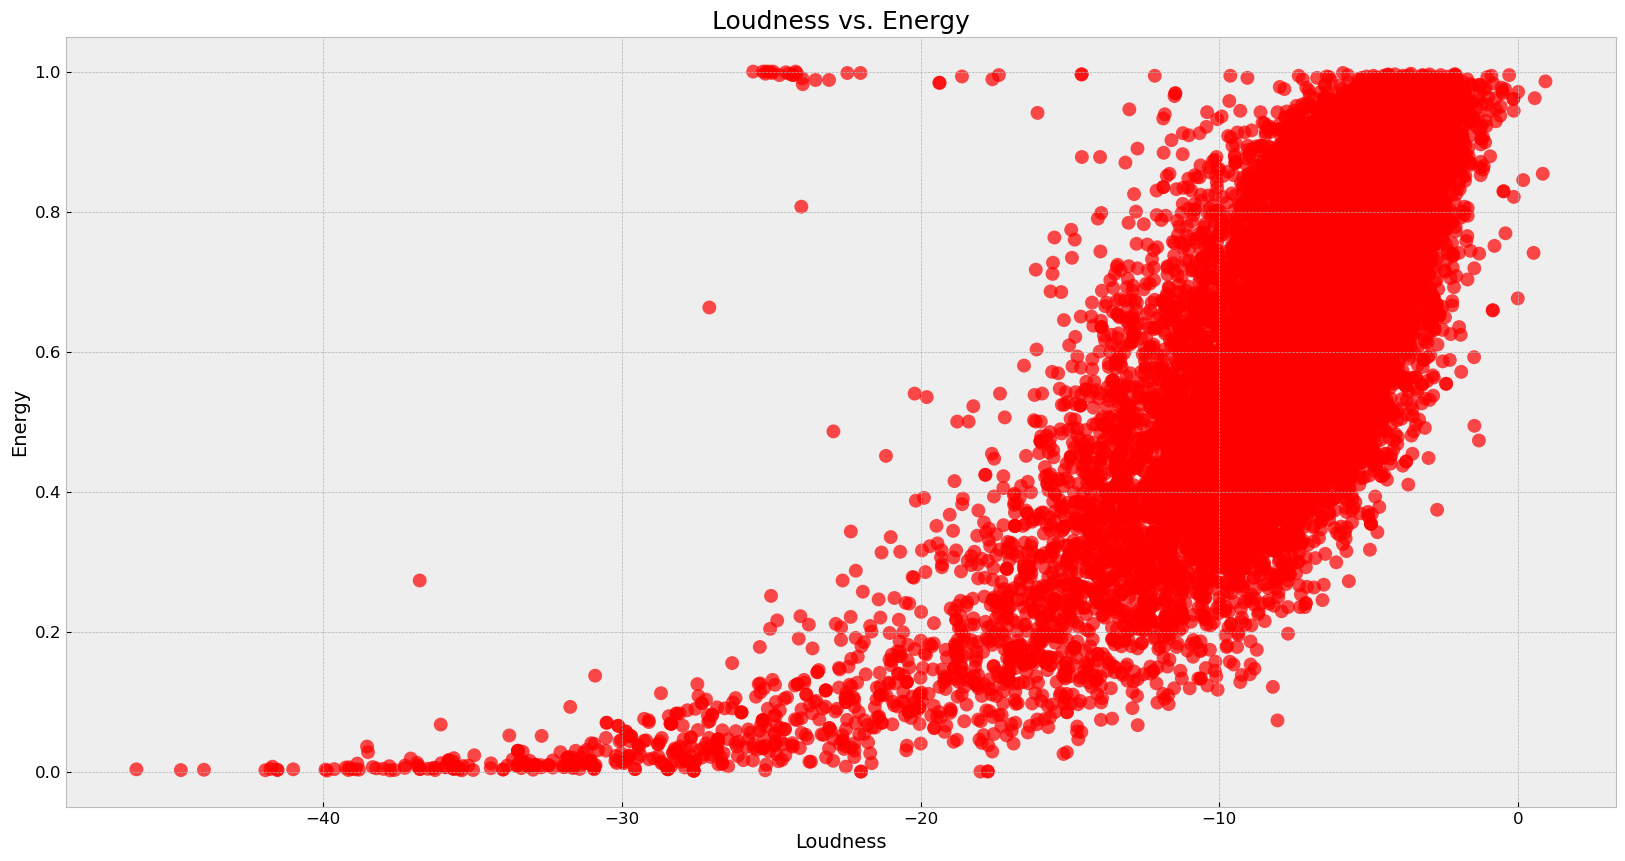

In [22]:
plt.scatter(df['Loudness'], df['Energy'], s=100, c='red', alpha=0.7, edgecolors='none')
plt.title('Loudness vs. Energy', fontsize=18)
plt.xlabel('Loudness', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.show()

The plot shows that as the loudness of the data increases, the energy also tends to increase. The markers on the plot are all red and have no edge colors, and the plot has a grid to help with visual interpretation. The title of the plot is "Loudness vs. Energy", and the labels for the x and y axes are "Loudness" and "Energy", respectively.

Overall, this plot provides a clear and concise visualization of the relationship between the two variables, allowing for easy interpretation and analysis of the data.

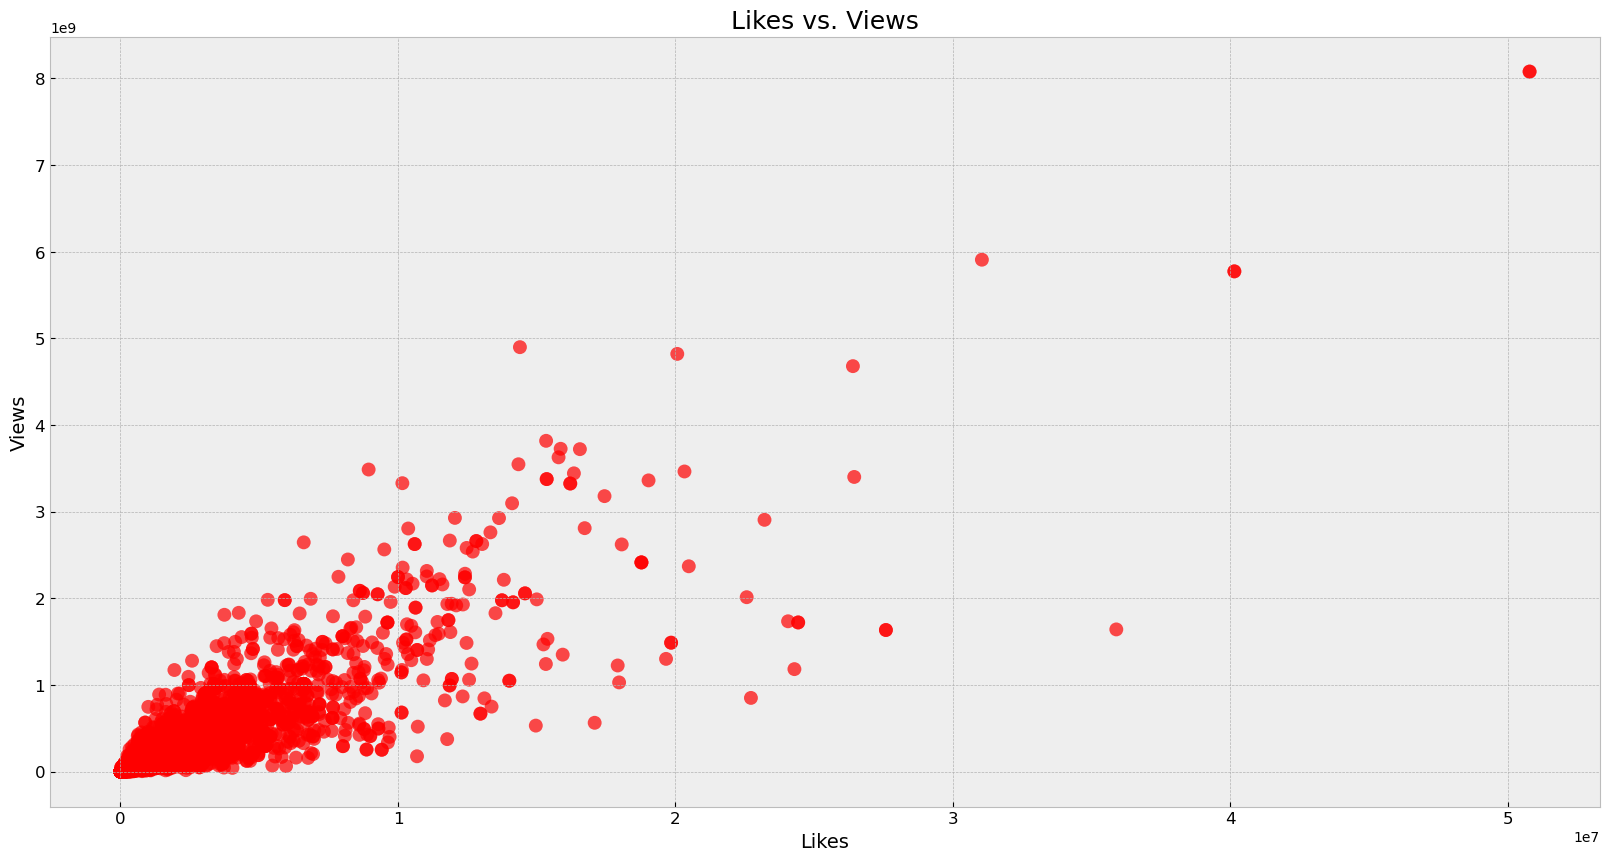

In [23]:
plt.scatter(df['Likes'], df['Views'], s=100, c='red', alpha=0.7, edgecolors='none')
plt.title('Likes vs. Views', fontsize=18)
plt.xlabel('Likes', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.show()

The plot shows that as the number of likes increases, the number of views also tends to increase. This suggests that there is a positive relationship between the two variables; as one variable increases, the other tends to increase as well. The markers on the plot are all red and have no edge colors, and the plot has a grid to help with visual interpretation.
